In [36]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    errors = (net_worths-predictions)**2
    cleaned_data =zip(ages,net_worths,errors)
    cleaned_data = sorted(cleaned_data,key=lambda x:x[2][0], reverse=True)
    limit = int(len(net_worths)*0.1)
        
    return cleaned_data[limit:]

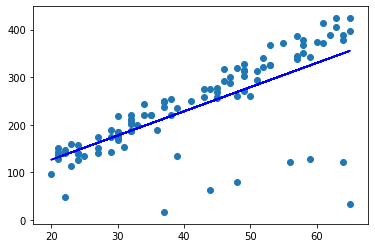

Slope [5.07793064] 
Score 0.8782624703664671 


In [24]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

reg = LinearRegression().fit(ages_train, net_worths_train)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

print("Slope %s " % reg.coef_[0])

print("Score %s " % reg.score(ages_test,net_worths_test))
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
    print ("can't make predictions to use in identifying outliers")

Slope [5.07793064] 


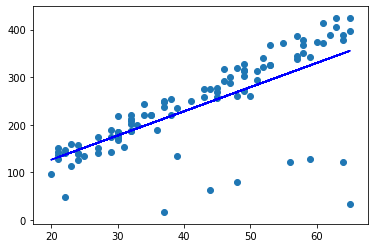

Slope Cleaned Data [6.36859481] 
Slope Cleaned Test Data 0.9831894553955322 


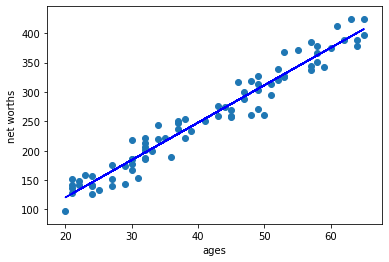

In [38]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
reg = LinearRegression().fit(ages_train, net_worths_train)

print("Slope %s " % reg.coef_[0])



try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
    print ("can't make predictions to use in identifying outliers")



### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
        print("Slope Cleaned Data %s " % reg.coef_[0])
        print("Slope Cleaned Test Data %s " % reg.score(ages_test,net_worths_test))
    except NameError:
        print ("you don't seem to have regression imported/created,")
        print ("   or else your regression object isn't named reg")
        print ("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")

In [ ]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below